In [9]:
import pandas as pd

# Assuming `file_path` points to your dataset CSV file
file_path = '/content/drive/MyDrive/kddcup99.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Define the label column
label_column = 'label'  # Replace with the actual label column name if different

# Map labels to binary (Normal -> 0, Attack -> 1)
attack_labels = [
    'buffer_overflow', 'loadmodule', 'perl', 'neptune', 'smurf',
    'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep', 'land',
    'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap', 'multihop',
    'warezmaster', 'warezclient', 'spy', 'rootkit'
]
data[label_column] = data[label_column].apply(lambda x: 0 if x == 'normal' else 1)

# Check label distribution
label_counts = data[label_column].value_counts()
label_percentage = data[label_column].value_counts(normalize=True) * 100

# Print results
print("Label Distribution (Counts):")
print(label_counts)
print("\nLabel Distribution (Percentage):")
print(label_percentage)



Label Distribution (Counts):
label
1    396743
0     97277
Name: count, dtype: int64

Label Distribution (Percentage):
label
1    80.309097
0    19.690903
Name: proportion, dtype: float64


Non-numeric columns detected: Index(['protocol_type', 'service', 'flag'], dtype='object')


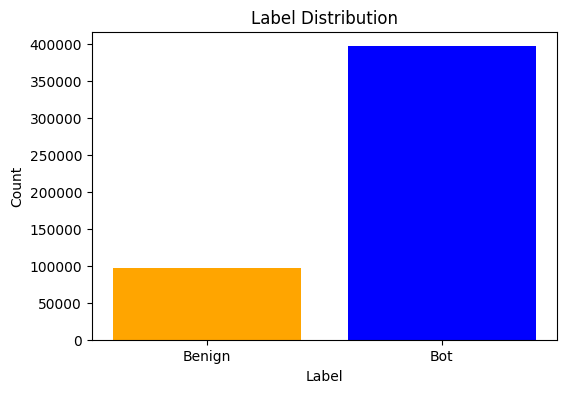

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2170/2170 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9923 - loss: 0.0252 - val_accuracy: 0.9982 - val_loss: 0.0067 - learning_rate: 0.0010
Epoch 2/100
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9982 - loss: 0.0062 - val_accuracy: 0.9973 - val_loss: 0.0077 - learning_rate: 0.0010
Epoch 3/100
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.9986 - val_loss: 0.0047 - learning_rate: 0.0010
Epoch 4/100
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9986 - loss: 0.0046 - val_accuracy: 0.9983 - val_loss: 0.0053 - learning_rate: 0.0010
Epoch 5/100
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9988 - loss: 0.0039 - val_accuracy: 0.9988 - val_loss: 0.0052 - learning_rate: 0.0010
Epoch 6/100
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9988 - loss: 0.0038 - val_accuracy: 0.9989 - val_loss: 0.0062 - learning_rate: 0.0010
Epoch 7/100
2170/2170 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9987 - loss:

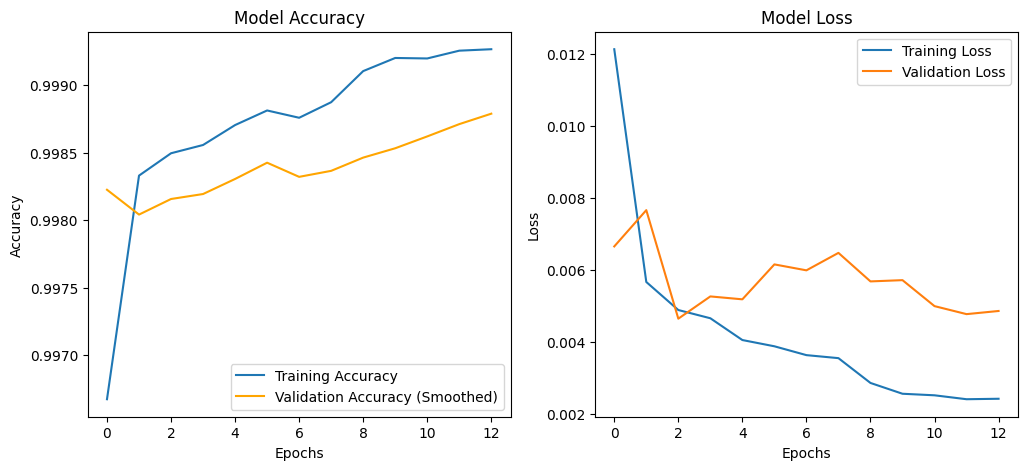

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


4632/4632 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Confusion Matrix:
[[ 29144     39]
 [   186 118837]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      1.00      1.00     29183
         Bot       1.00      1.00      1.00    119023

    accuracy                           1.00    148206
   macro avg       1.00      1.00      1.00    148206
weighted avg       1.00      1.00      1.00    148206



In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, Dropout, Input, LayerNormalization, MultiHeadAttention, Add, Flatten, Reshape
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    label_column = 'label'

    if label_column not in data.columns:
        raise KeyError(f"The specified label column '{label_column}' is missing in the dataset.")

    # Binary mapping for the label column
    attack_labels = [
        'buffer_overflow', 'loadmodule', 'perl', 'neptune', 'smurf',
        'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep', 'land',
        'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap', 'multihop',
        'warezmaster', 'warezclient', 'spy', 'rootkit'
    ]
    data[label_column] = data[label_column].apply(lambda x: 0 if x == 'normal' else 1)

    # Handle non-numeric columns
    non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
    if len(non_numeric_cols) > 0:
        print(f"Non-numeric columns detected: {non_numeric_cols}")
        from sklearn.preprocessing import LabelEncoder
        for col in non_numeric_cols:
            data[col] = LabelEncoder().fit_transform(data[col])

    # Replace missing or infinite values
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.fillna(data.mean(), inplace=True)

    # Extract features and labels
    X = data.drop(columns=[label_column])
    y = data[label_column]
    return X, y


# Step 2: Plot label distribution (unchanged)
def plot_label_distribution(y):
    label_counts = y.value_counts()
    plt.figure(figsize=(6, 4))
    plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])
    plt.xticks(ticks=[0, 1], labels=["Benign", "Bot"])
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.title("Label Distribution")
    plt.show()

# Step 3: Split data into training, validation, and test sets (unchanged)
def split_data(X, y):
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Step 4: Balance the training data using SMOTE (unchanged)
def balance_training_data(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

# Step 5: Build Transformer-based model (unchanged)
def build_transformer_model(input_dim, num_heads=4, key_dim=64, dense_units=128, dropout_rate=0.3):
    inputs = Input(shape=(input_dim,))
    reshaped_inputs = Reshape((1, input_dim))(inputs)
    x = Dense(dense_units, activation='relu')(reshaped_inputs)
    x = Dropout(dropout_rate)(x)
    norm1 = LayerNormalization()(x)
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(norm1, norm1)
    attn_output = Add()([x, attn_output])
    norm2 = LayerNormalization()(attn_output)
    dense_output = Dense(dense_units, activation='relu')(norm2)
    dense_output = Add()([attn_output, dense_output])
    flatten_output = Flatten()(dense_output)
    x = Dense(dense_units // 2, activation='relu')(flatten_output)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 6: Train the model with class weighting and learning rate scheduler
def train_model(model, X_train, y_train, X_val, y_val, class_weights):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=128,  # Increased batch size
        class_weight=class_weights,
        callbacks=[early_stopping, lr_scheduler]
    )
    return history

# Step 7: Smooth and plot training metrics
def smooth_curve(values, smoothing_factor=0.8):
    smoothed_values = []
    for i, val in enumerate(values):
        if i == 0:
            smoothed_values.append(val)
        else:
            smoothed_values.append(smoothing_factor * smoothed_values[-1] + (1 - smoothing_factor) * val)
    return smoothed_values

def plot_training_metrics(history):
    plt.figure(figsize=(12, 5))

    # Smooth accuracy
    smoothed_val_accuracy = smooth_curve(history.history['val_accuracy'])

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(smoothed_val_accuracy, label='Validation Accuracy (Smoothed)', color='orange')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Main Script
if __name__ == "__main__":
    file_path = '/content/drive/MyDrive/kddcup99.csv'
    X, y = load_and_preprocess_data(file_path)
    plot_label_distribution(y)
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    X_train, y_train = balance_training_data(X_train, y_train)
    class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
    class_weights = dict(enumerate(class_weights))
    model = build_transformer_model(input_dim=X_train.shape[1])
    history = train_model(model, X_train, y_train, X_val, y_val, class_weights)
    plot_training_metrics(history)


    # Step 8: Generate predictions and print confusion matrix
    y_pred = model.predict(X_test)  # Predict probabilities
    y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
    cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Optionally print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["Benign", "Bot"]))


Non-numeric columns detected: Index(['protocol_type', 'service', 'flag'], dtype='object')


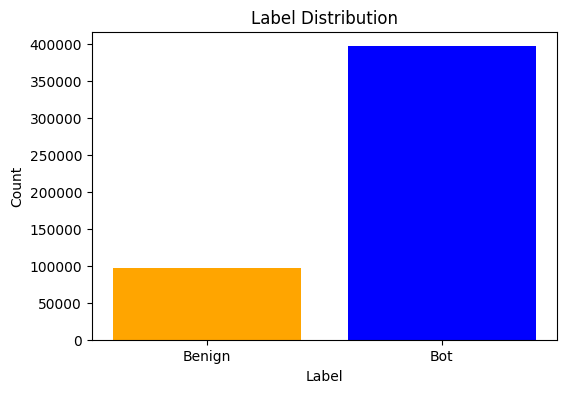

Class distribution in y_train before adjustment: (array([0, 1]), array([ 47666, 194403]))
Class distribution in y_val: (array([0, 1]), array([20428, 83317]))
Class distribution in y_test: (array([0, 1]), array([ 29183, 119023]))
Class distribution in y_train before SMOTE: (array([0, 1]), array([ 47666, 194403]))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution after SMOTE: (array([0, 1]), array([194403, 194403]))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9084 - loss: 0.2468 - val_accuracy: 0.9930 - val_loss: 0.0221 - learning_rate: 0.0010
Epoch 2/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9941 - loss: 0.0353 - val_accuracy: 0.9965 - val_loss: 0.0163 - learning_rate: 0.0010
Epoch 3/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9957 - loss: 0.0255 - val_accuracy: 0.9971 - val_loss: 0.0144 - learning_rate: 0.0010
Epoch 4/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9966 - loss: 0.0207 - val_accuracy: 0.9975 - val_loss: 0.0126 - learning_rate: 0.0010
Epoch 5/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9970 - loss: 0.0181 - val_accuracy: 0.9976 - val_loss: 0.0123 - learning_rate: 0.0010
Epoch 6/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9970 - loss: 0.0168 - val_accuracy: 0.9977 - val_loss: 0.0116 - learning_rate: 0.0010
Epoch 7/50
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9970 - l

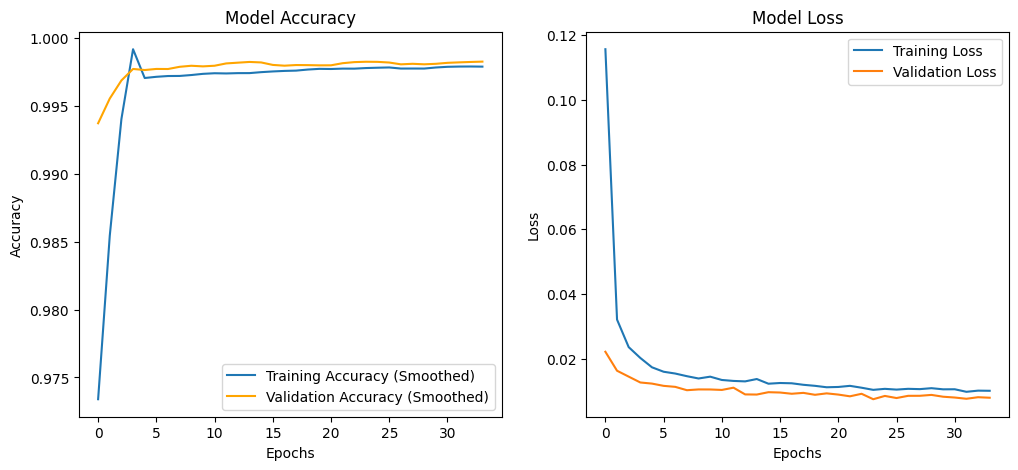

4632/4632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


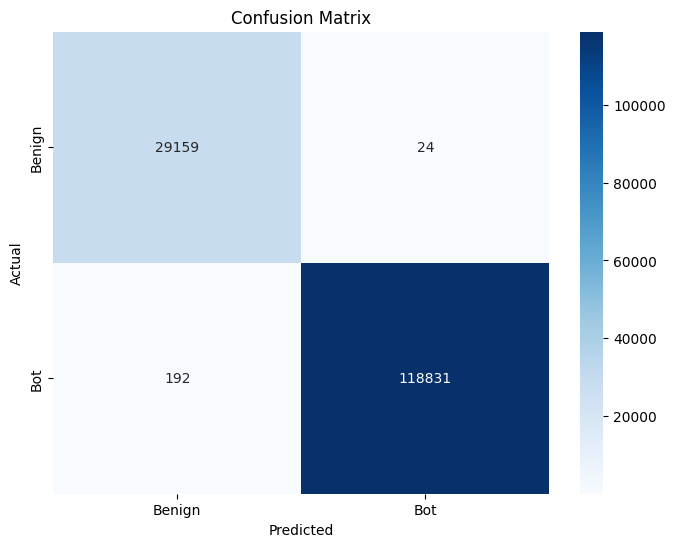

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     29183
           1       1.00      1.00      1.00    119023

    accuracy                           1.00    148206
   macro avg       1.00      1.00      1.00    148206
weighted avg       1.00      1.00      1.00    148206



In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    label_column = 'label'

    if label_column not in data.columns:
        raise KeyError(f"The specified label column '{label_column}' is missing in the dataset.")

    # Binary mapping for the label column
    attack_labels = [
        'buffer_overflow', 'loadmodule', 'perl', 'neptune', 'smurf',
        'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep', 'land',
        'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap', 'multihop',
        'warezmaster', 'warezclient', 'spy', 'rootkit'
    ]
    data[label_column] = data[label_column].apply(lambda x: 0 if x == 'normal' else 1)

    # Handle non-numeric columns
    non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
    if len(non_numeric_cols) > 0:
        print(f"Non-numeric columns detected: {non_numeric_cols}")
        from sklearn.preprocessing import LabelEncoder
        for col in non_numeric_cols:
            data[col] = LabelEncoder().fit_transform(data[col])

    # Replace missing or infinite values
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.fillna(data.mean(), inplace=True)

    # Extract features and labels
    X = data.drop(columns=[label_column])
    y = data[label_column]
    return X, y

# Step 2: Plot label distribution
def plot_label_distribution(y):
    label_counts = y.value_counts()
    plt.figure(figsize=(6, 4))
    plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])
    plt.xticks(ticks=[0, 1], labels=["Benign", "Bot"])
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.title("Label Distribution")
    plt.show()

# Step 3: Split data into training, validation, and test sets
def split_data(X, y):
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

    # Ensure both classes are present in training data
    print("Class distribution in y_train before adjustment:", np.unique(y_train, return_counts=True))
    if len(np.unique(y_train)) < 2:
        print("Warning: Only one class present in y_train. Adjusting...")
        minority_class = 1 if np.sum(y_train) == 0 else 0

        # Find indices of minority class samples in validation set
        minority_indices = np.where(y_val == minority_class)[0]
        if len(minority_indices) == 0:
            raise ValueError("The dataset is too imbalanced. No minority class samples available for augmentation.")

        # Add minority class samples from validation set to training set
        X_train = np.vstack([X_train, X_val.iloc[minority_indices]])
        y_train = np.hstack([y_train, y_val.iloc[minority_indices]])
        print("Adjusted class distribution in y_train:", np.unique(y_train, return_counts=True))

    print("Class distribution in y_val:", np.unique(y_val, return_counts=True))
    print("Class distribution in y_test:", np.unique(y_test, return_counts=True))

    return X_train, X_val, X_test, y_train, y_val, y_test

# Step 4: Balance the training data using SMOTE
def balance_training_data(X_train, y_train):
    if len(np.unique(y_train)) < 2:
        raise ValueError("SMOTE cannot be applied because only one class is present in the training data.")

    smote = SMOTE(random_state=42)
    print("Class distribution in y_train before SMOTE:", np.unique(y_train, return_counts=True))
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    print("Class distribution after SMOTE:", np.unique(y_train_smote, return_counts=True))
    return X_train_smote, y_train_smote

# Step 5: Build a Dense Neural Network model
def build_dense_nn_model(input_dim, dense_units=32, dropout_rate=0.5):  # Reduced model complexity
    model = Sequential()
    model.add(Dense(dense_units, activation='relu', input_dim=input_dim, kernel_regularizer=l2(1e-4)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units // 2, activation='relu', kernel_regularizer=l2(1e-4)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 6: Train the model
def train_model(model, X_train, y_train, X_val, y_val, class_weights):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,  # Reduced to 50 epochs
        batch_size=256,
        class_weight=class_weights,
        callbacks=[early_stopping, lr_scheduler]
    )
    return history

# Step 7: Smooth and plot training metrics
def smooth_curve(values, window_length=7, polyorder=2):
    return savgol_filter(values, window_length=window_length, polyorder=polyorder)

def plot_training_metrics(history):
    plt.figure(figsize=(12, 5))

    # Smooth accuracy
    smoothed_val_accuracy = smooth_curve(history.history['val_accuracy'])
    smoothed_train_accuracy = smooth_curve(history.history['accuracy'])

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(smoothed_train_accuracy, label='Training Accuracy (Smoothed)')
    plt.plot(smoothed_val_accuracy, label='Validation Accuracy (Smoothed)', color='orange')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Step 8: Evaluate and plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Bot'], yticklabels=['Benign', 'Bot'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Main Script
if __name__ == "__main__":
    file_path = '/content/drive/MyDrive/kddcup99.csv'  # Change this to your dataset path
    X, y = load_and_preprocess_data(file_path)
    plot_label_distribution(y)
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Balance the training data
    try:
        X_train, y_train = balance_training_data(X_train, y_train)
    except ValueError as e:
        print(f"Error during balancing: {e}")
        print("Ensure that the dataset has sufficient samples for both classes.")

    # Compute class weights
    if len(np.unique(y_train)) > 1:
        class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
        class_weights = dict(enumerate(class_weights))
    else:
        class_weights = None

    # Build and train the model
    model = build_dense_nn_model(input_dim=X_train.shape[1])
    history = train_model(model, X_train, y_train, X_val, y_val, class_weights)

    # Plot training metrics
    plot_training_metrics(history)

    # Plot confusion matrix
    plot_confusion_matrix(model, X_test, y_test)


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    label_column = 'label'

    if label_column not in data.columns:
        raise KeyError(f"The specified label column '{label_column}' is missing in the dataset.")

    # Binary mapping for the label column
    attack_labels = [
        'buffer_overflow', 'loadmodule', 'perl', 'neptune', 'smurf',
        'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep', 'land',
        'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap', 'multihop',
        'warezmaster', 'warezclient', 'spy', 'rootkit'
    ]
    data[label_column] = data[label_column].apply(lambda x: 0 if x == 'normal' else 1)

    # Handle non-numeric columns
    non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
    if len(non_numeric_cols) > 0:
        print(f"Non-numeric columns detected: {non_numeric_cols}")
        from sklearn.preprocessing import LabelEncoder
        for col in non_numeric_cols:
            data[col] = LabelEncoder().fit_transform(data[col])

    # Replace missing or infinite values
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.fillna(data.mean(), inplace=True)

    # Extract features and labels
    X = data.drop(columns=[label_column])
    y = data[label_column]
    return X, y

# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
data = data[numeric_cols]

# Split features and labels
X = data.drop(columns=[label_column])
y = data[label_column]

# Split data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

# Balance training data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Print class distributions
print("Class distribution in y_train after SMOTE:", np.unique(y_train, return_counts=True))
print("Class distribution in y_val:", np.unique(y_val, return_counts=True))
print("Class distribution in y_test:", np.unique(y_test, return_counts=True))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution in y_train after SMOTE: (array([0, 1]), array([194403, 194403]))
Class distribution in y_val: (array([0, 1]), array([20428, 83317]))
Class distribution in y_test: (array([0, 1]), array([ 29183, 119023]))


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Reshape data for CNN input (add channel dimension)
X_train_cnn = X_train[..., np.newaxis]
X_val_cnn = X_val[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

# Build CNN model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
cnn_lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

cnn_history = cnn_model.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=50,
    batch_size=128,
    class_weight=class_weights,
    callbacks=[cnn_early_stopping, cnn_lr_scheduler]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9877 - loss: 0.0547 - val_accuracy: 0.9976 - val_loss: 0.0094 - learning_rate: 0.0010
Epoch 2/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9974 - loss: 0.0101 - val_accuracy: 0.9981 - val_loss: 0.0085 - learning_rate: 0.0010
Epoch 3/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9978 - loss: 0.0083 - val_accuracy: 0.9976 - val_loss: 0.0071 - learning_rate: 0.0010
Epoch 4/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9980 - loss: 0.0069 - val_accuracy: 0.9973 - val_loss: 0.0079 - learning_rate: 0.0010
Epoch 5/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9980 - loss: 0.0069 - val_accuracy: 0.9980 - val_loss: 0.0056 - learning_rate: 0.0010
Epoch 6/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9981 - loss: 0.0066 - val_accuracy: 0.9981 - val_loss: 0.0054 - learning_rate: 0.0010
Epoch 7/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9982 - 

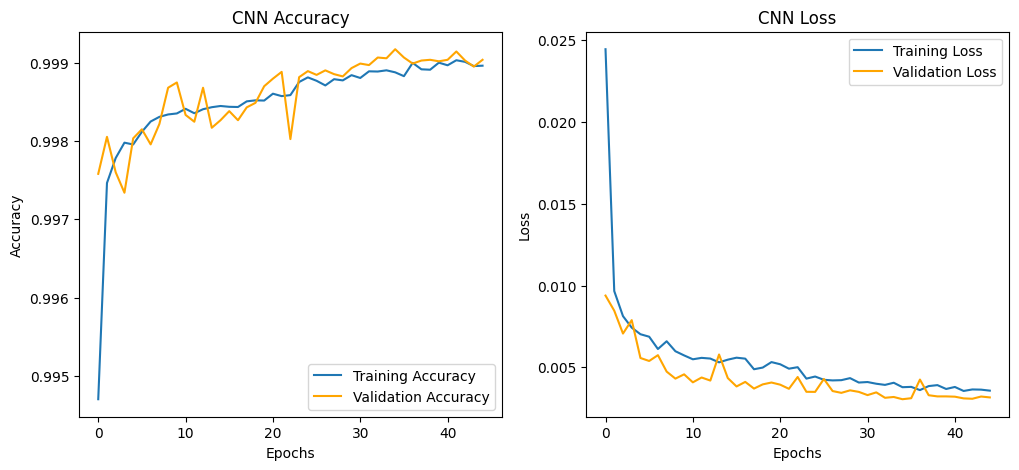

4632/4632 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29183
           1       1.00      1.00      1.00    119023

    accuracy                           1.00    148206
   macro avg       1.00      1.00      1.00    148206
weighted avg       1.00      1.00      1.00    148206



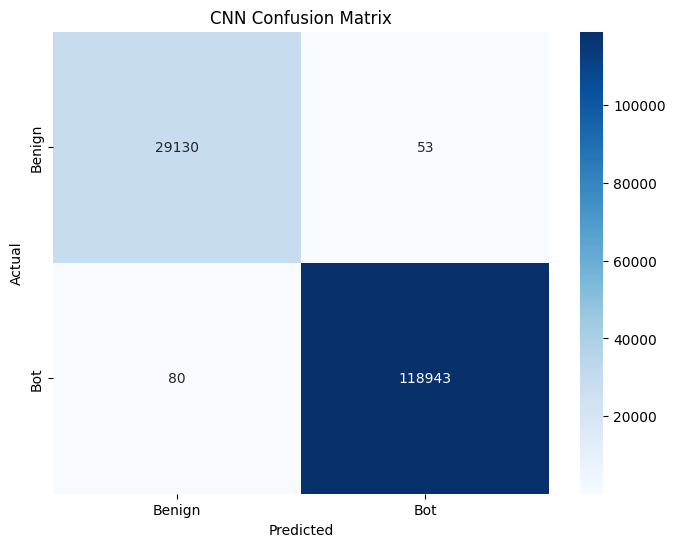

In [15]:
def plot_training_metrics(history, title):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Bot'], yticklabels=['Benign', 'Bot'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# CNN Evaluation
plot_training_metrics(cnn_history, "CNN")
evaluate_model(cnn_model, X_test_cnn, y_test, "CNN")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9026 - loss: 10.0612 - val_accuracy: 0.9853 - val_loss: 0.0430 - learning_rate: 0.0010
Epoch 2/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9867 - loss: 0.0400 - val_accuracy: 0.9918 - val_loss: 0.0242 - learning_rate: 0.0010
Epoch 3/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9927 - loss: 0.0245 - val_accuracy: 0.9931 - val_loss: 0.0215 - learning_rate: 0.0010
Epoch 4/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9932 - loss: 0.0204 - val_accuracy: 0.9948 - val_loss: 0.0199 - learning_rate: 0.0010
Epoch 5/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9953 - loss: 0.0154 - val_accuracy: 0.9957 - val_loss: 0.0142 - learning_rate: 0.0010
Epoch 6/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9960 - loss: 0.0135 - val_accuracy: 0.9927 - val_loss: 0.0153 - learning_rate: 0.0010
Epoch 7/50
3038/3038 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.

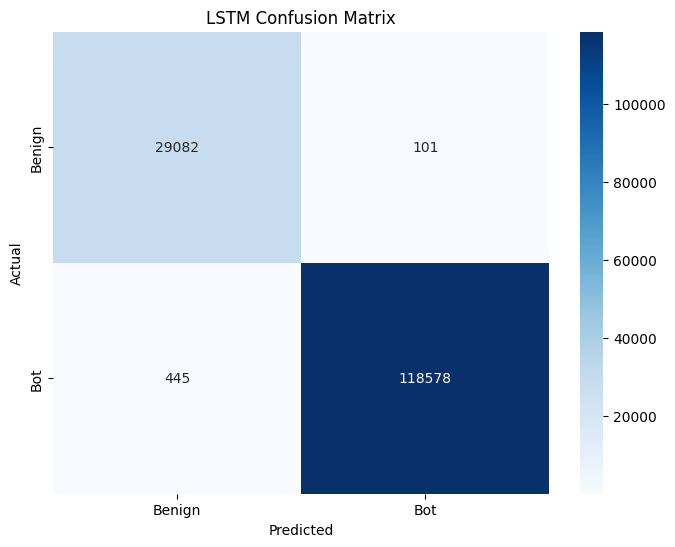

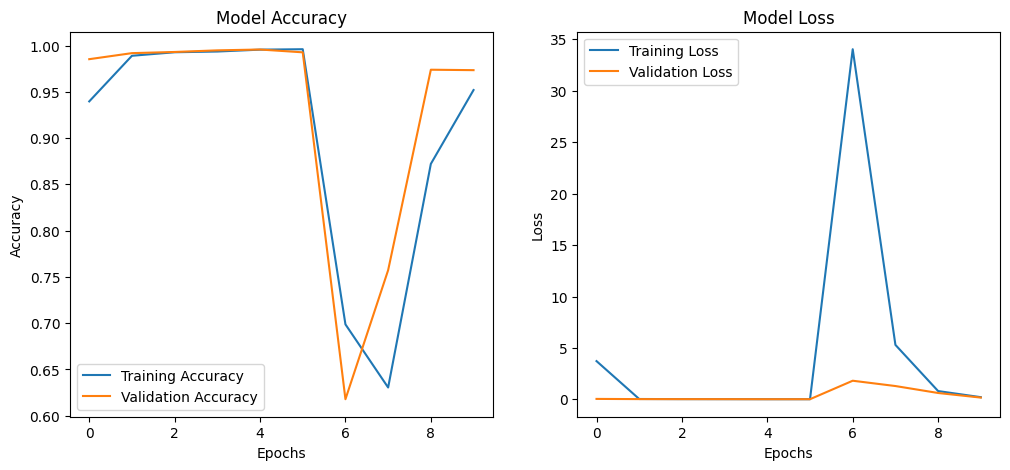

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Reshape data for LSTM input
X_train_lstm = X_train[..., np.newaxis]  # Add time dimension
X_val_lstm = X_val[..., np.newaxis]
X_test_lstm = X_test[..., np.newaxis]

# Build the LSTM model
lstm_model = Sequential([
    LSTM(32, activation='relu', return_sequences=False, input_shape=(X_train_lstm.shape[1], 1)),  # Single LSTM layer
    Dropout(0.3),  # Moderate dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

history = lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=50,  # Reduced epochs for faster convergence
    batch_size=128,  # Larger batch size for faster execution
    class_weight=class_weights,  # Handle imbalanced data
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate and plot results
def evaluate_lstm_model():
    y_pred = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)

    # Classification report
    print("LSTM Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Bot'], yticklabels=['Benign', 'Bot'])
    plt.title("LSTM Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot accuracy and loss curves
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

evaluate_lstm_model()
